# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint 
# Import API key
from api_keys import api_key
import warnings
warnings.filterwarnings('ignore')

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
def chunks(l, n):
   # For item i in a range that is a length of l,
   for i in range(0, len(l), n):
       # Create an index range for l of n items:
       yield l[i:i+n]
        
Sets = list(chunks(cities, 50))


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url="https://api.openweathermap.org/data/2.5/weather?"
url_api_key = f"{url}appid={api_key}";

cityName=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
latitude=[]
longitude=[]
temperature=[]
windSpeed=[]

print("Beginning Data Retrieval")
print("-----------------------------")
for set in Sets:
    for x in range(0,len(set)):
        weather_api_url=f"{url_api_key}&q={set[x]}"
        try:
            print("Processing Record {} of Set {} | {}".format(x if Sets.index(set) > 0 else x+1, Sets.index(set)+1, set[x]))            
            response=requests.get(weather_api_url,verify=False).json()
            temperature.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            windSpeed.append(response['wind']['speed'])
            longitude.append(response['coord']['lon'])
            latitude.append(response['coord']['lat'])
            cityName.append(city)
            country.append(response['sys']['country'])
            date.append(response['dt'])
    #         pprint(response)
        except:
            print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")
# Save config information.

weather=zip(cityName,cloudiness,country,date,humidity,longitude,latitude,temperature,windSpeed)
weather=list(weather)
# weather
# Build partial query URL


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | ati
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | flinders
Processing Record 6 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 1 | itarema
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | babstovo
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | clyde river
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | rosita
Processing Record 17 of Set 1 | nyuzen
Processing Record 18 of Set 1 | conde
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | kuito
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 | talas


Processing Record 39 of Set 4 | kholmogory
Processing Record 40 of Set 4 | dutse
Processing Record 41 of Set 4 | balabac
Processing Record 42 of Set 4 | port blair
Processing Record 43 of Set 4 | domat
Processing Record 44 of Set 4 | murdochville
Processing Record 45 of Set 4 | broome
Processing Record 46 of Set 4 | hue
Processing Record 47 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 48 of Set 4 | daru
Processing Record 49 of Set 4 | iqaluit
Processing Record 0 of Set 5 | saleaula
City not found. Skipping...
Processing Record 1 of Set 5 | fairbanks
Processing Record 2 of Set 5 | boyolangu
Processing Record 3 of Set 5 | chuka
Processing Record 4 of Set 5 | auki
Processing Record 5 of Set 5 | ust-nera
Processing Record 6 of Set 5 | tawnat
City not found. Skipping...
Processing Record 7 of Set 5 | san patricio
Processing Record 8 of Set 5 | stoyba
City not found. Skipping...
Processing Record 9 of Set 5 | acapulco
Processing Record 10 of Set 5 | ostrovnoy
Processing Record 11 o

Processing Record 20 of Set 8 | luderitz
Processing Record 21 of Set 8 | kemijarvi
City not found. Skipping...
Processing Record 22 of Set 8 | naryan-mar
Processing Record 23 of Set 8 | torbay
Processing Record 24 of Set 8 | itoman
Processing Record 25 of Set 8 | oxford
Processing Record 26 of Set 8 | saint-joseph
Processing Record 27 of Set 8 | xining
Processing Record 28 of Set 8 | cazaje
City not found. Skipping...
Processing Record 29 of Set 8 | sampit
Processing Record 30 of Set 8 | blagoyevo
Processing Record 31 of Set 8 | zonguldak
Processing Record 32 of Set 8 | umm lajj
Processing Record 33 of Set 8 | puerto escondido
Processing Record 34 of Set 8 | padang
Processing Record 35 of Set 8 | fortuna
Processing Record 36 of Set 8 | chake chake
Processing Record 37 of Set 8 | santa maria
Processing Record 38 of Set 8 | suzhou
Processing Record 39 of Set 8 | van
Processing Record 40 of Set 8 | shirokiy
Processing Record 41 of Set 8 | lorengau
Processing Record 42 of Set 8 | quatre co

Processing Record 10 of Set 12 | karamay
City not found. Skipping...
Processing Record 11 of Set 12 | presidente dutra
Processing Record 12 of Set 12 | jonkoping
Processing Record 13 of Set 12 | kutum
Processing Record 14 of Set 12 | wewak
Processing Record 15 of Set 12 | utiroa
City not found. Skipping...
Processing Record 16 of Set 12 | korablino
Processing Record 17 of Set 12 | tarko-sale
Processing Record 18 of Set 12 | ambunti
Processing Record 19 of Set 12 | stargard szczecinski
Processing Record 20 of Set 12 | anloga
Processing Record 21 of Set 12 | kamenka
Processing Record 22 of Set 12 | savannah bight
Processing Record 23 of Set 12 | shahganj
Processing Record 24 of Set 12 | baruun-urt
Processing Record 25 of Set 12 | johnstown
Processing Record 26 of Set 12 | formosa
Processing Record 27 of Set 12 | haapiti
Processing Record 28 of Set 12 | chumikan
Processing Record 29 of Set 12 | samarai
Processing Record 30 of Set 12 | krasnoselkup
City not found. Skipping...
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_df = pd.DataFrame(weather)
weather_df = weather_df.rename(columns={0:"City",1:"Cloudiness",2:"Country",3:"Date",4:"Humidity",5:"Lng",6:"Lat",7:"Max Temp",8:"Wind Speed"})
as_of = time.strftime("%D", time.localtime(int(response['dt'])))
weather_df.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lng           557
Lat           557
Max Temp      557
Wind Speed    557
dtype: int64

In [15]:
weather_df.to_csv("weather.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lng,Lat,Max Temp,Wind Speed
0,kasongo-lunda,90,CL,1561518428,96,-70.91,-53.16,273.150,3.10
1,kasongo-lunda,0,AU,1561518431,76,115.35,-33.64,292.040,16.40
2,kasongo-lunda,37,TD,1561518433,42,18.34,13.21,304.015,8.73
3,kasongo-lunda,96,BR,1561518435,66,-46.00,-20.63,291.815,1.67
4,kasongo-lunda,75,AU,1561518436,55,150.85,-34.58,290.930,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

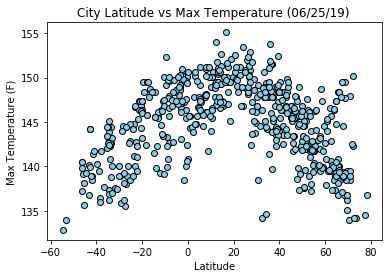

In [16]:
weather_df["Max Temp"] = (weather_df["Max Temp"] - 32) * 5/9 
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],marker="o", facecolors="skyblue", edgecolors="black",)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({as_of}) ")
plt.savefig("latTemp.png")

#### Latitude vs. Humidity Plot

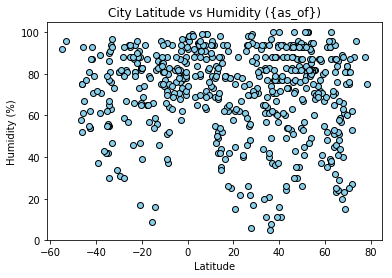

In [17]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],marker="o", facecolors="skyblue", edgecolors="black",)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity ({as_of})")
plt.savefig("latHumid.png")

#### Latitude vs. Cloudiness Plot

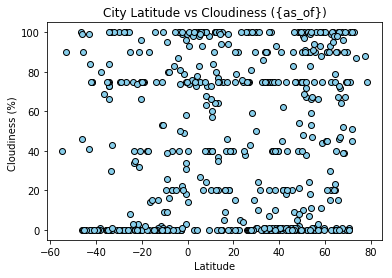

In [18]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],marker="o", facecolors="skyblue", edgecolors="black",)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%) ")
plt.title("City Latitude vs Cloudiness ({as_of})")
plt.savefig("latCloud.png")

#### Latitude vs. Wind Speed Plot

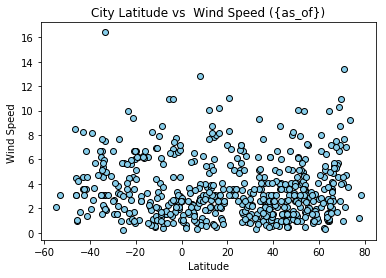

In [19]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],marker="o", facecolors="skyblue", edgecolors="black",)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed ")
plt.title("City Latitude vs  Wind Speed ({as_of})")
plt.savefig("latWind.png")

In [10]:
# plt.scatter(weather_df["Humidity"],weather_df["Max Temp"],marker="o", facecolors="skyblue", edgecolors="black",)
# plt.xlabel("Max Temp")
# plt.ylabel("Humidity ")


In [11]:
# plt.scatter(weather_df["Humidity"],weather_df["Cloudiness"],marker="o", facecolors="skyblue", edgecolors="black",)
# plt.ylabel("Cloudiness")
# plt.xlabel("Humidity")
